In [1]:
# import libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.figure_factory as ff
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib

In [2]:
df = pd.read_csv(r'C:\Users\hriti\Downloads\_All_Cities_Cleaned.csv\_All_Cities_Cleaned.csv')

In [3]:
df.head(10)


,seller_type,bedroom,layout_type,property_type,locality,price,area,furnish_type,bathroom,city
0,OWNER,2.0,BHK,Apartment,Bodakdev,20000.0,1450.0,Furnished,2.0,Ahmedabad
1,OWNER,1.0,RK,Studio Apartment,CG Road,7350.0,210.0,Semi-Furnished,1.0,Ahmedabad
2,OWNER,3.0,BHK,Apartment,Jodhpur,22000.0,1900.0,Unfurnished,3.0,Ahmedabad
3,OWNER,2.0,BHK,Independent House,Sanand,13000.0,1285.0,Semi-Furnished,2.0,Ahmedabad
4,OWNER,2.0,BHK,Independent House,Navrangpura,18000.0,1600.0,Furnished,2.0,Ahmedabad
5,OWNER,1.0,BHK,Apartment,Vejalpur,8500.0,570.0,Unfurnished,1.0,Ahmedabad
6,OWNER,1.0,RK,Studio Apartment,Jivraj Park,6000.0,180.0,Semi-Furnished,1.0,Ahmedabad
7,OWNER,2.0,BHK,Apartment,Nikol,12000.0,1200.0,Semi-Furnished,2.0,Ahmedabad
8,OWNER,2.0,BHK,Apartment,Shahibuag,13000.0,1126.0,Semi-Furnished,2.0,Ahmedabad
9,OWNER,4.0,BHK,Independent House,Maninagar,38500.0,3500.0,Furnished,4.0,Ahmedabad


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193011 entries, 0 to 193010
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   seller_type    193011 non-null  object 
 1   bedroom        193011 non-null  float64
 2   layout_type    193011 non-null  object 
 3   property_type  193011 non-null  object 
 4   locality       193011 non-null  object 
 5   price          193011 non-null  float64
 6   area           193011 non-null  float64
 7   furnish_type   193011 non-null  object 
 8   bathroom       193011 non-null  float64
 9   city           193011 non-null  object 
dtypes: float64(4), object(6)
memory usage: 14.7+ MB


In [5]:
df.shape

(193011, 10)

In [6]:
print("There are {} duplicate values.".format(df.duplicated().sum()))
df[df.duplicated(keep=False)].head(10)

There are 85398 duplicate values.


,seller_type,bedroom,layout_type,property_type,locality,price,area,furnish_type,bathroom,city
0,OWNER,2.0,BHK,Apartment,Bodakdev,20000.0,1450.0,Furnished,2.0,Ahmedabad
3,OWNER,2.0,BHK,Independent House,Sanand,13000.0,1285.0,Semi-Furnished,2.0,Ahmedabad
8,OWNER,2.0,BHK,Apartment,Shahibuag,13000.0,1126.0,Semi-Furnished,2.0,Ahmedabad
12,AGENT,3.0,BHK,Apartment,Shilaj,20000.0,1440.0,Semi-Furnished,3.0,Ahmedabad
14,AGENT,2.0,BHK,Apartment,Jodhpur Village,25000.0,1250.0,Furnished,1.0,Ahmedabad
18,AGENT,2.0,BHK,Apartment,Chandkheda,12500.0,1044.0,Unfurnished,2.0,Ahmedabad
19,AGENT,2.0,BHK,Apartment,Bodakdev,12000.0,810.0,Unfurnished,2.0,Ahmedabad
20,AGENT,3.0,BHK,Apartment,Bopal,38000.0,1985.0,Furnished,3.0,Ahmedabad
21,AGENT,2.0,BHK,Apartment,Prahlad Nagar,14000.0,1256.0,Unfurnished,2.0,Ahmedabad
22,AGENT,4.0,BHK,Apartment,Satellite,110000.0,3375.0,Furnished,4.0,Ahmedabad


In [7]:
df = df.drop_duplicates()
df = df.reset_index(drop=True)

In [8]:
print("There are {} duplicate values.".format(df.duplicated().sum()))
df.info()

There are 0 duplicate values.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107613 entries, 0 to 107612
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   seller_type    107613 non-null  object 
 1   bedroom        107613 non-null  float64
 2   layout_type    107613 non-null  object 
 3   property_type  107613 non-null  object 
 4   locality       107613 non-null  object 
 5   price          107613 non-null  float64
 6   area           107613 non-null  float64
 7   furnish_type   107613 non-null  object 
 8   bathroom       107613 non-null  float64
 9   city           107613 non-null  object 
dtypes: float64(4), object(6)
memory usage: 8.2+ MB


In [9]:
df.isnull().sum()

seller_type      0
bedroom          0
layout_type      0
property_type    0
locality         0
price            0
area             0
furnish_type     0
bathroom         0
city             0
dtype: int64

In [10]:
## Since we are working with property data, it is impossible or does not make sense to have 0 values for certain columns
# we need to drop observations with value = 0 for these columns
# drop NoOfBathroom = 0
# drop NoOfBedroom = 0
df = df[df["bedroom"] != 0].reset_index(drop=True)
df= df[df["price"] != 0].reset_index(drop=True)
df = df[df["area"] != 0].reset_index(drop=True)
df = df[df["bathroom"] != 0].reset_index(drop=True)
df.head(10)

,seller_type,bedroom,layout_type,property_type,locality,price,area,furnish_type,bathroom,city
0,OWNER,2.0,BHK,Apartment,Bodakdev,20000.0,1450.0,Furnished,2.0,Ahmedabad
1,OWNER,1.0,RK,Studio Apartment,CG Road,7350.0,210.0,Semi-Furnished,1.0,Ahmedabad
2,OWNER,3.0,BHK,Apartment,Jodhpur,22000.0,1900.0,Unfurnished,3.0,Ahmedabad
3,OWNER,2.0,BHK,Independent House,Sanand,13000.0,1285.0,Semi-Furnished,2.0,Ahmedabad
4,OWNER,2.0,BHK,Independent House,Navrangpura,18000.0,1600.0,Furnished,2.0,Ahmedabad
5,OWNER,1.0,BHK,Apartment,Vejalpur,8500.0,570.0,Unfurnished,1.0,Ahmedabad
6,OWNER,1.0,RK,Studio Apartment,Jivraj Park,6000.0,180.0,Semi-Furnished,1.0,Ahmedabad
7,OWNER,2.0,BHK,Apartment,Nikol,12000.0,1200.0,Semi-Furnished,2.0,Ahmedabad
8,OWNER,2.0,BHK,Apartment,Shahibuag,13000.0,1126.0,Semi-Furnished,2.0,Ahmedabad
9,OWNER,4.0,BHK,Independent House,Maninagar,38500.0,3500.0,Furnished,4.0,Ahmedabad


In [11]:
des_stats = df.describe(exclude = ['object']).drop(index = ['count'], axis = 0).T
skew = []
kurt = []
num_cols = df.select_dtypes(exclude = ['object']).columns
for col in num_cols:
    skew.append(df[col].skew().round(1))
    kurt.append(df[col].kurt().round(1))

stats = pd.DataFrame({'skew':skew,'kurt':kurt}, index = num_cols)

all_stats = pd.merge(left = des_stats,right = stats, left_index = True, right_index = True)

In [12]:
all_stats

,mean,std,min,25%,50%,75%,max,skew,kurt
bedroom,2.103064,0.986132,1.0,1.0,2.0,3.0,15.0,1.4,7.8
price,47062.173176,103286.677747,1200.0,13000.0,20100.0,37000.0,5885000.0,10.5,266.8
area,1295.448487,1115.707184,3.0,650.0,1000.0,1450.0,19800.0,3.4,17.7
bathroom,2.069908,0.971900,1.0,1.0,2.0,3.0,19.0,1.6,8.9


In [13]:
sx = df.describe(exclude = ['int64', 'float64','float']).drop(index = ['count'], axis = 0).T
sx

,unique,top,freq
seller_type,3,AGENT,79156
layout_type,2,BHK,102280
property_type,6,Apartment,74162
locality,4146,Thane West,1925
furnish_type,3,Semi-Furnished,53521
city,8,Mumbai,32663


In [14]:
with pd.option_context('float_format', '{:f}'.format): print(df["price"].describe())

count    107613.000000
mean      47062.173176
std      103286.677747
min        1200.000000
25%       13000.000000
50%       20100.000000
75%       37000.000000
max     5885000.000000
Name: price, dtype: float64


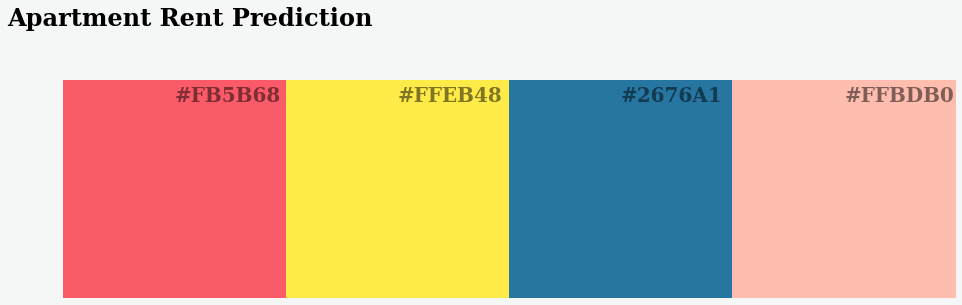

In [15]:
# color palette
#black  '#1F0C07',
#light pink '#FA74BF'

colors = ['#FB5B68','#FFEB48','#2676A1','#FFBDB0',]
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("",colors)


sns.palplot(colors, size = 4)
plt.text(-0.75,-0.75, 'Apartment Rent Prediction',{'font':'serif', 'size':24, 'weight':'bold'})
for idx,values in enumerate(colors):
    plt.text(idx,-0.40, colors[idx],{'font':'serif', 'size':20, 'weight':'bold'}, alpha = 0.5)
plt.gcf().set_facecolor('#f5f6f6')
plt.box(None)
plt.axis('off')
plt.show()

C:\Users\hriti\AppData\Local\Temp\ipykernel_14032\1949006619.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df1=round(df[['price', 'property_type']].groupby('property_type').apply(lambda x: x.mean()))


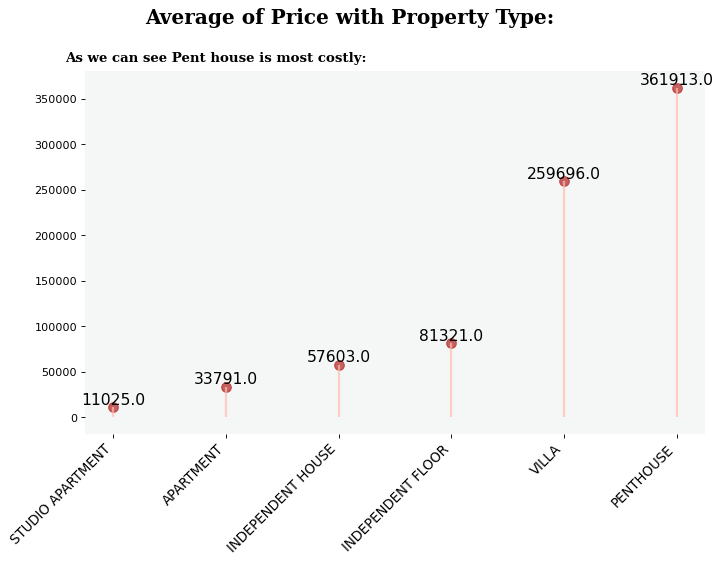

In [16]:
df1=round(df[['price', 'property_type']].groupby('property_type').apply(lambda x: x.mean()))
df1.sort_values('price',inplace=True)
df1.reset_index(inplace=True)

fig, ax = plt.subplots(figsize=(10,6), dpi= 80)
ax.vlines(x=df1.index,ymin=0,ymax=df1.price,color = colors[3],alpha=0.7,linewidth=2)
ax.scatter(x=df1.index, y=df1.price, s=75, color='firebrick', alpha=0.7)

# Title, Label, Ticks and Ylim
#ax.set_title('Average of Property Type With Price', fontdict={'size':22})

ax.set_xticks(df1.index)
ax.set_xticklabels(df1.property_type.str.upper(), rotation=45, fontdict={'horizontalalignment': 'right', 'size':12})

ax.set_facecolor('#f5f6f6')
for loc in ['left', 'right', 'top', 'bottom']:
        ax.spines[loc].set_visible(False)
for row in df1.itertuples():
    ax.text(row.Index, row.price+.5, s=round(row.price, 2), horizontalalignment= 'center', verticalalignment='bottom', fontsize=14)

fig.text(0.2,0.98,"Average of Price with Property Type:",**{'font':'serif', 'size':18,'weight':'bold'}, alpha = 1)
fig.text(0.1,0.90,"As we can see Pent house is most costly:",**{'font':'serif', 'size':12,'weight':'bold'}, alpha = 1)

plt.show()

C:\Users\hriti\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


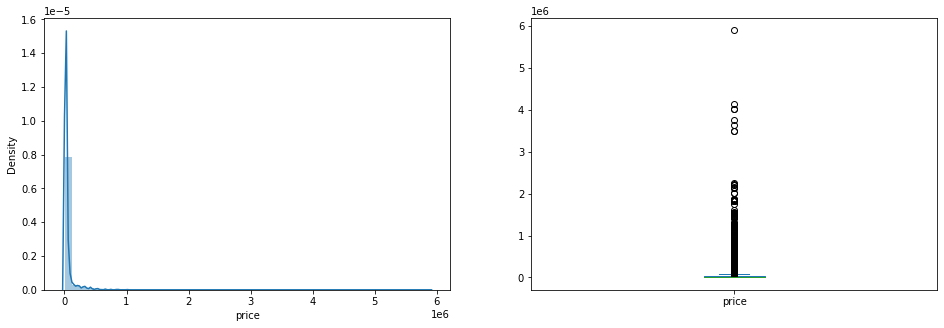

In [17]:
# Handle outliners

plt.subplot(121)
sns.distplot(df["price"]);

plt.subplot(122)
df["price"].plot.box(figsize=(16,5))

plt.show()

In [18]:
# drop houses whose rent is more than 200000

df = df[df["price"] <= 200000].reset_index(drop=True)

print("Data type is {0} \n\nShape of dataframe is {1}\n".format(type(df), df.shape))

Data type is <class 'pandas.core.frame.DataFrame'> 

Shape of dataframe is (102304, 10)



C:\Users\hriti\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


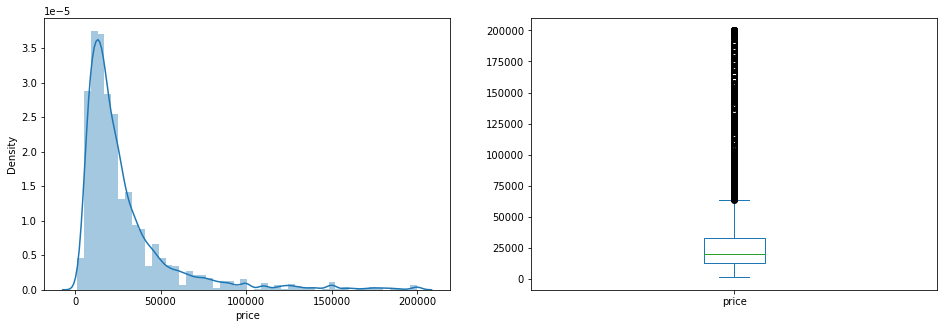

In [19]:
plt.subplot(121)
sns.distplot(df["price"]);

plt.subplot(122)
df["price"].plot.box(figsize=(16,5))
plt.savefig("distribution.png", bbox_inches="tight")

plt.show()

C:\Users\hriti\AppData\Local\Temp\ipykernel_14032\2807351351.py:52: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df[col].value_counts().index , rotation = 90,**{'font':'serif', 'size':7.5, 'weight':'bold'}, alpha = 1)
C:\Users\hriti\AppData\Local\Temp\ipykernel_14032\2807351351.py:52: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df[col].value_counts().index , rotation = 90,**{'font':'serif', 'size':7.5, 'weight':'bold'}, alpha = 1)
C:\Users\hriti\AppData\Local\Temp\ipykernel_14032\2807351351.py:52: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df[col].value_counts().index , rotation = 90,**{'font':'serif', 'size':7.5, 'weight':'bold'}, alpha = 1)
C:\Users\hriti\AppData\Local\Temp\ipykernel_14032\2807351351.py:52: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df[col].value_counts().index 

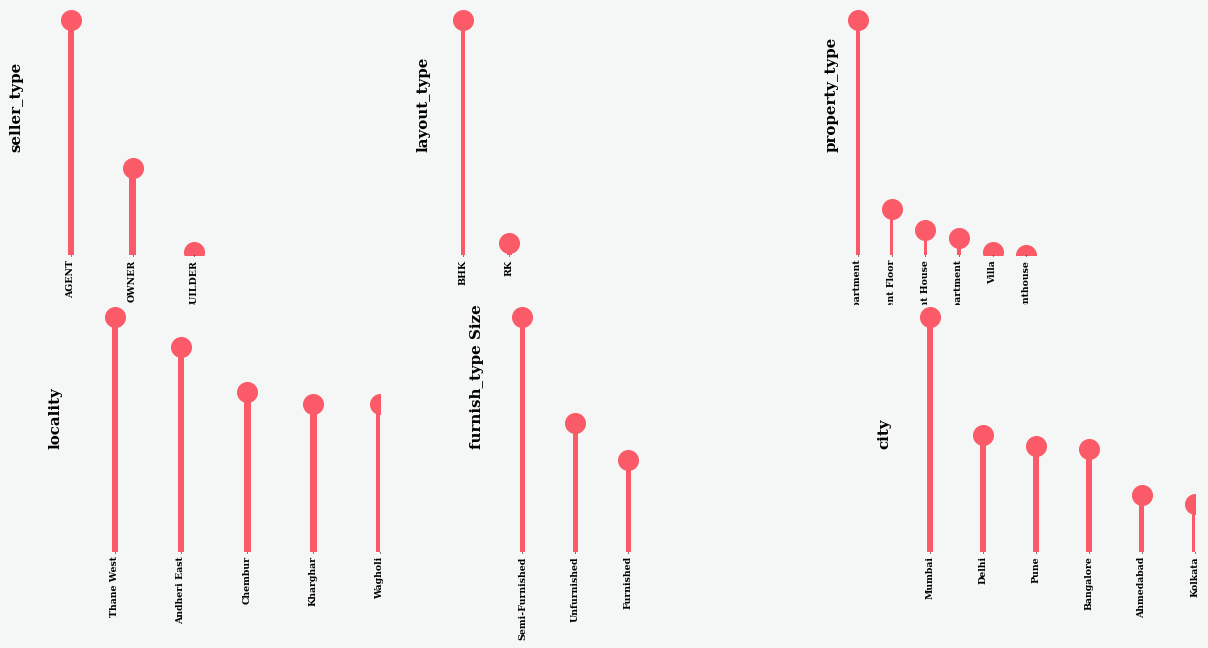

In [20]:
fig =  plt.figure(figsize = (17,8), dpi = 90)
fig.patch.set_facecolor('#f5f6f6')


                                            
gs = fig.add_gridspec(2,3)
gs.update(wspace =0.1,hspace = 0.2)


ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])

ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[1,2])




axes = [ax0,ax1,ax2,ax3, ax4,ax5,]


for ax in axes:
    ax.set_facecolor('#f5f6f6')
    ax.tick_params(axis='x',
                   labelsize = 1, which = 'major',
                   direction = 'out',pad = 2,
                   length = 1)
    ax.tick_params(axis='y', colors= 'black')
    ax.axes.get_yaxis().set_visible(False)
    ax.axes.get_xaxis().set_visible(True)
    
    for loc in ['left', 'right', 'top', 'bottom']:
        ax.spines[loc].set_visible(False)
        
cols = df.select_dtypes(exclude = ['int64','float64','float']).columns
labels = ['seller_type', 'layout_type', 'property_type', 'locality', 'furnish_type Size', 'city']





### ax0- carat
s = 250

for col,ax,label in zip(cols,axes,labels):
    ax.bar(x = df[col].value_counts().index, height = df[col].value_counts().values, width = 0.1, color = colors[0] )
    ax.scatter(x = df[col].value_counts().index, y = df[col].value_counts().values, s = s,color = colors[0] )
    ht = df[col].value_counts().values.max()
    ax.text(-1,ht/2.2 ,label,**{'font':'serif', 'size':12, 'weight':'bold', 'rotation' : 'vertical'}, alpha = 1)
    ax.set_xticklabels(df[col].value_counts().index , rotation = 90,**{'font':'serif', 'size':7.5, 'weight':'bold'}, alpha = 1)
    
    
    

        
ax0.set_xlim(-1,5)
ax1.set_xlim(-1,7)
ax2.set_xlim(-1,10)
ax3.set_xlim(-1.6,4)
ax4.set_xlim(-2,5)
ax5.set_xlim(-2,5)








fig.show()

In [21]:
df.head()

,seller_type,bedroom,layout_type,property_type,locality,price,area,furnish_type,bathroom,city
0,OWNER,2.0,BHK,Apartment,Bodakdev,20000.0,1450.0,Furnished,2.0,Ahmedabad
1,OWNER,1.0,RK,Studio Apartment,CG Road,7350.0,210.0,Semi-Furnished,1.0,Ahmedabad
2,OWNER,3.0,BHK,Apartment,Jodhpur,22000.0,1900.0,Unfurnished,3.0,Ahmedabad
3,OWNER,2.0,BHK,Independent House,Sanand,13000.0,1285.0,Semi-Furnished,2.0,Ahmedabad
4,OWNER,2.0,BHK,Independent House,Navrangpura,18000.0,1600.0,Furnished,2.0,Ahmedabad


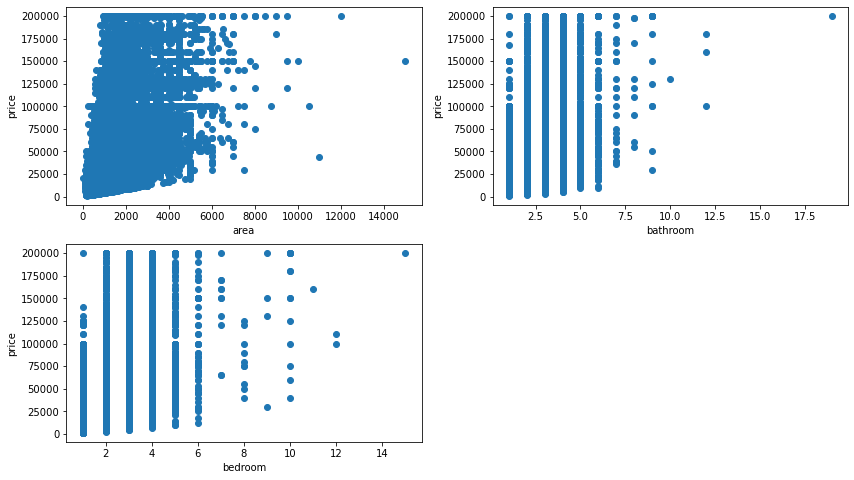

In [22]:
plt.figure(figsize=(14, 8))

plt.subplot(2, 2, 1)
plt.scatter(x=df["area"], y=df["price"])
plt.xlabel("area")
plt.ylabel("price")

plt.subplot(2, 2, 2)
plt.scatter(x=df["bathroom"], y=df["price"])
plt.xlabel("bathroom")
plt.ylabel("price")

plt.subplot(2, 2, 3)
plt.scatter(x=df["bedroom"], y=df["price"])
plt.xlabel("bedroom")
plt.ylabel("price")

plt.savefig("scatterplots.png", bbox_inches="tight")
plt.show()

In [23]:
## Correlation ( gives relationship between features )
corr = df[["area", "bathroom", "bedroom", "price","locality"]].corr()
corr

,area,bathroom,bedroom,price
area,1.000000,0.778461,0.796832,0.585877
bathroom,0.778461,1.000000,0.837659,0.555547
bedroom,0.796832,0.837659,1.000000,0.518031
price,0.585877,0.555547,0.518031,1.000000


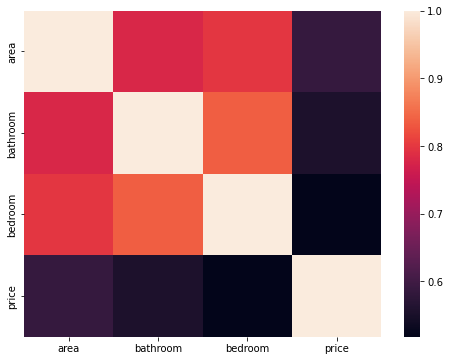

In [24]:
plt.subplots(figsize=(8,6))

fig = sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

fig.get_figure().savefig("corr_heatmap.png", bbox_inches="tight") 

In [25]:
df["furnish_type"].unique()

array(['Furnished', 'Semi-Furnished', 'Unfurnished'], dtype=object)

In [26]:
df["seller_type"]=df["seller_type"].map({'OWNER':0,'AGENT':1,'BUILDER':2})
df["layout_type"]=df["layout_type"].map({'BHK':0,'RK':1})
df["property_type"]=df["property_type"].map({'Apartment':0,'Studio Apartment':1,'Independent House':2,'Independent Floor':3,'Villa':4,'Penthouse':5})
df["furnish_type"]=df["furnish_type"].map({'Furnished':0,'Semi-Furnished':1,'Unfurnished':2})
df["city"]=df["city"].map({'Ahmedabad':0,'Bangalore':1,'Chennai':2,'Delhi':3,'Hyderabad':4,'Kolkata':5,'Mumbai':6,'Pune':7})

In [27]:
df.head()

,seller_type,bedroom,layout_type,property_type,locality,price,area,furnish_type,bathroom,city
0,0,2.0,0,0,Bodakdev,20000.0,1450.0,0,2.0,0
1,0,1.0,1,1,CG Road,7350.0,210.0,1,1.0,0
2,0,3.0,0,0,Jodhpur,22000.0,1900.0,2,3.0,0
3,0,2.0,0,2,Sanand,13000.0,1285.0,1,2.0,0
4,0,2.0,0,2,Navrangpura,18000.0,1600.0,0,2.0,0


In [28]:
# take log on prices and area , it gives better result

df["price"]=np.log(df["price"])
df["area"]=np.log(df["area"])

C:\Users\hriti\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


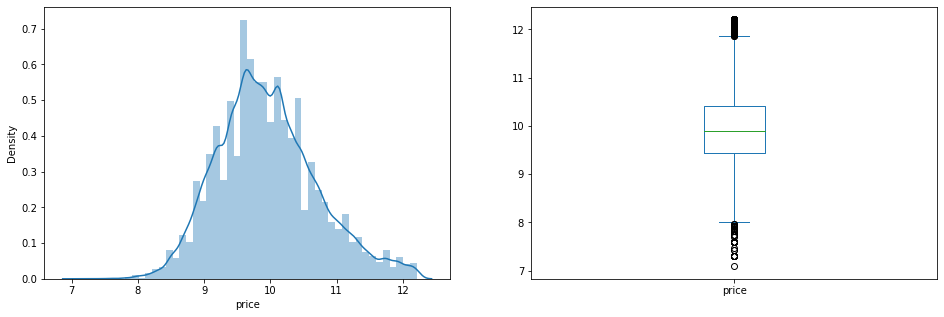

In [29]:
plt.subplot(121)
sns.distplot(df["price"]);

plt.subplot(122)
df["price"].plot.box(figsize=(16,5))
plt.savefig("distribution.png", bbox_inches="tight")

plt.show()

In [30]:
dum=pd.get_dummies(df["locality"],drop_first=True)

In [31]:
dum.columns

Index(['10 Sector Number 3 Road', '10 Sector Number 6 Road', '100 Feet Road',
       '11 Sector Number 6 Road', '14TH ROAD', '17th Main Road',
       '1st Block Jayanagar', '1st Cross', '1st Phase JP Nagar',
       '1st block Kalyan Nagar',
       ...
       'vignan nagar', 'vikaspuri', 'vile parle', 'vile parle east',
       'vile parle west', 'vivekananda Nagar', 'wadebolhai', 'wakad',
       'worli sea Fase', 'yogi nagar'],
      dtype='object', length=4115)

In [32]:
dum2=pd.DataFrame(dum,columns=dum.columns)

In [33]:
df2=pd.concat([df,dum2],axis=1)

In [34]:
df2.drop("locality",axis=1,inplace=True)

In [35]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102304 entries, 0 to 102303
Columns: 4124 entries, seller_type to yogi nagar
dtypes: float64(4), int64(5), uint8(4115)
memory usage: 408.5 MB


In [36]:
df2.head()

,seller_type,bedroom,layout_type,property_type,price,area,furnish_type,bathroom,city,10 Sector Number 3 Road,...,vignan nagar,vikaspuri,vile parle,vile parle east,vile parle west,vivekananda Nagar,wadebolhai,wakad,worli sea Fase,yogi nagar
0,0,2.0,0,0,9.903488,7.279319,0,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1.0,1,1,8.902456,5.347108,1,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,3.0,0,0,9.998798,7.549609,2,3.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,2.0,0,2,9.472705,7.158514,1,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,2.0,0,2,9.798127,7.377759,0,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
##
# MOdelling

X=df2.drop("price",axis=1)
y=df2["price"]

In [38]:
y

0         9.903488
1         8.902456
2         9.998798
3         9.472705
4         9.798127
            ...   
102299    9.491753
102300    8.853665
102301    9.047821
102302    9.711116
102303    9.392662
Name: price, Length: 102304, dtype: float64

In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

In [40]:
from sklearn import metrics

In [41]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [42]:
# make predictions
y_pred = regressor.predict(X_test)

In [43]:
print("Linear Regression R-squared: {}".format(regressor.score(X_test, y_test)))

Linear Regression R-squared: -2.186106102100458e+18


In [44]:
# another method of calculating R-squared
from sklearn.metrics import r2_score
lin_r2 = r2_score(y_test, y_pred)

print("Liner Regression R-squared: {}".format(lin_r2))

Liner Regression R-squared: -2.186106102100458e+18


In [45]:
from sklearn.metrics import mean_squared_error

lin_mse = mean_squared_error(y_pred, y_test)
lin_rmse = np.sqrt(lin_mse)
print("Liner Regression RMSE: {}".format(lin_rmse))

Liner Regression RMSE: 1106631883.2049315


In [46]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(y_pred, y_test)
print("Liner Regression MAE: {}".format(lin_mae))

Liner Regression MAE: 38055305.55126557


In [47]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(random_state=0)
model.fit(X_train,y_train)

RandomForestRegressor(random_state=0)

In [48]:
y_pred =model.predict(X_test)

In [49]:
model.score(X_test,y_test)

0.8404047353738419

In [50]:
print("Random Forest R-squared: {}".format(model.score(X_test, y_test)))

Random Forest R-squared: 0.8404047353738419


In [51]:
# another method of calculating R-squared
from sklearn.metrics import r2_score
forest_r2 = r2_score(y_test, y_pred)

print("Random Forest R-squared: {}".format(forest_r2))

Random Forest R-squared: 0.8404047353738419


In [52]:
from sklearn.metrics import mean_squared_error

forest_mse = mean_squared_error(y_pred, y_test)
forest_rmse = np.sqrt(forest_mse)
print("Random Forest Regression RMSE: {}".format(forest_rmse))

Random Forest Regression RMSE: 0.2990043873627265


In [53]:
from sklearn.metrics import mean_absolute_error

forest_mae = mean_absolute_error(y_pred, y_test)
print("Random Forest Regression MAE: {}".format(forest_mae))


Random Forest Regression MAE: 0.20905841905560535


In [54]:
# import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor
gbreg = GradientBoostingRegressor(random_state=0)

In [55]:
gbreg.fit(X_train, y_train)

GradientBoostingRegressor(random_state=0)

In [56]:
y_pred = gbreg.predict(X_test)

In [57]:
print("Gradient Boosting Regressor R-squared: {}".format(gbreg.score(X_test, y_test)))

Gradient Boosting Regressor R-squared: 0.7416459381191645


In [58]:
from sklearn.metrics import r2_score
gbr_r2 = r2_score(y_test, y_pred)

print("Gradient Boosting Regressor R-squared: {}".format(gbr_r2))

Gradient Boosting Regressor R-squared: 0.7416459381191645


In [59]:
from sklearn.metrics import mean_squared_error

gbr_mse = mean_squared_error(y_pred, y_test)
gbr_rmse = np.sqrt(gbr_mse)
print("Gradient Boosting Regressor Regression RMSE: {}".format(gbr_rmse))

Gradient Boosting Regressor Regression RMSE: 0.3804303941895326


In [60]:
from sklearn.metrics import mean_absolute_error

gbr_mae = mean_absolute_error(y_pred, y_test)
print("Gradient Boosting Regressor Regression MAE: {}".format(gbr_mae))

Gradient Boosting Regressor Regression MAE: 0.29231970656910683


In [61]:
data = {"Model": ["Linear Regression", "Random Forest", "Gradient Boosting"], 
        "R-squared": [lin_r2, forest_r2, gbr_r2],           
        "RMSE": [lin_rmse, forest_rmse, gbr_rmse],
        "MAE": [lin_mae, forest_mae, gbr_mae]}

results = pd.DataFrame(data=data)
results

,Model,R-squared,RMSE,MAE
0,Linear Regression,-2.186106e+18,1.106632e+09,3.805531e+07
1,Random Forest,8.404047e-01,2.990044e-01,2.090584e-01
2,Gradient Boosting,7.416459e-01,3.804304e-01,2.923197e-01


In [62]:
# Suggestions for Improvement
#collect more data, include more states like Penang and other parts of Malaysia
#select other features or conduct feature engineering on existing features
#further fine tune the hyperparameters of the models




In [63]:
#Discussion and Conclusion
#i.e. 84.14% of the variability in rental prices can be explained using the several features. 
#Among all the models, Gradient Boosting Regressor also has the lowest RMSE and MAE values. .
